# TELCO CHURN PREDICTION 
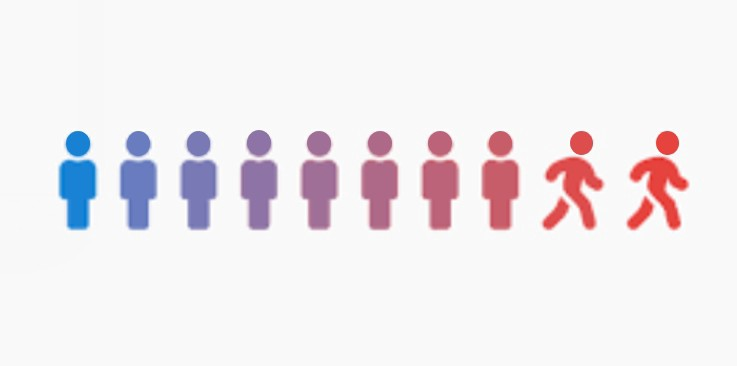

## What is Customer Churn? 
Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base, for example in businesses with a subscriber-based service model such as mobile telephone networks and pay TV operators.

> Wiki says "Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period" 

Churn rate can be calculated by dividing the number of customers you lost during that time period. It is a possible indicator of customer dissatisfaction, cheaper and/or better offers from the competition, more successful sales and/or marketing by the competition, or reasons having to do with the customer life cycle.

This notebook contains exploratory data analysis of the IBM dataset. The Business objective here is to predict the telco customer churn based on the previous data. 

# 1. Import the libraries

In [ ]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#setting colormap for all the plots in the notebook
sns.set_palette('icefire')

# 2. Import the Dataset
The IBM Sample Dataset used in this notebook has information about Telco customers and if they left the company within the last month (churn). Each row represents a unique costumer, while the columns contains information about customer’s services, account and demographic data.

In [ ]:
#import the dataset
churn = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn.head()

# 3. Dataset Overview

In [ ]:
#data shape
churn.shape

The Telco Customer Churn dataset contains a total of **7043** rows and **21** different features.
* It contains customer information such as their age, gender and if they have partner or dependents
* We have columns that indicate the services a particular customer has signed up for
* We have other columns that indicate customer account information such as monthly charges,contract type, payment method and others
* Our target variable for this analysis is named **Churn**

**Columns in the dataset**

In [ ]:
#columns in the dataset
churn.columns

In [ ]:
#datatypes of the features
churn.dtypes

In [ ]:
#converting total charges to numeric from object
churn.TotalCharges = pd.to_numeric(churn.TotalCharges, errors='coerce')
#checking for null values in the dataset
churn.isnull().sum()

**There are 11 null/missing values in the column Total charges of our dataset. We will replace these values with zero**

In [ ]:
#Removing missing values from the dataset
churn.dropna(inplace = True)

In [ ]:
#checking for null values in the dataset again
churn.isnull().sum()

**There are no missing/null values in the dataset**

# 4. Exploration Data Analysis
We will explore our dataset to understand different patterns in the dataset. We will begin by checking the target variable distribution

In [ ]:
#lets explore the target variable distribution
pd.crosstab(index=churn["Churn"],  # Make a crosstab
                              columns="count")      # Name the count column



From the table above, you can see there is a class imbalance in the target variable. We have more instances for negative class ("NO") compared to the class of interest ("YES"). 

We understand that 26.5% of our data that is about the Churned customers

**Let's investigate the dataset furthur with regards to binary categorical variables**

The plot below shows distribution of binary categorical variables by the target variable

In [ ]:
#exploring all the binary categorical data
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

sns.countplot(x="gender", data=churn, ax=axes[0,0])
sns.countplot(x="SeniorCitizen", data=churn, ax=axes[0,1])
sns.countplot(x="Partner", data=churn, ax=axes[0,2])
sns.countplot(x="Dependents", data=churn, ax=axes[1,0])
sns.countplot(x="PhoneService", data=churn, ax=axes[1,1])
sns.countplot(x="PaperlessBilling", data=churn, ax=axes[1,2])

## Exploring categorical variables

**1) Gender Distribution** - About 50% of our customers are Male and other half are Female. The crosstab below shows that the outcome of the target variable doesnot depend on the Gender.

In [ ]:
#exploring each binary variable and their effect on the target variable
#gender vs churn
pd.crosstab(churn["gender"], churn["Churn"], normalize = "index")

**2) Age Distribution** - Young customers are presominant in our dataset. The cross tab calculation with respect to Age shows that a Senior customer is more likely to churn when comapared to a younger customer

In [ ]:
#senior citizen vs churn
pd.crosstab(churn["SeniorCitizen"], churn["Churn"], normalize = "index")

**3) Partner Distribution** - About half of our customers have partners and it can be said that a customer with a partner is less likely to churn

In [ ]:
#partner vs churn
pd.crosstab(churn["Partner"], churn["Churn"], normalize = "index")

**4) Dependents Distribution** - 30% of our customers have dependents and are less likely to churn compared to a customer with no dependents.

In [ ]:
#Dependents vs churn
pd.crosstab(churn["Dependents"], churn["Churn"], normalize = "index")

In [ ]:
#phone services vs churn
pd.crosstab(churn["PhoneService"], churn["Churn"], normalize = "index")

In [ ]:
#paperless billing vs churn
pd.crosstab(churn["PaperlessBilling"], churn["Churn"], normalize = "index")

## Other Categorical variables in the Dataset
**Internet Services** - Customers who opted for Fiber Optic type of internet services are most likely to churn. This indicates the service provided was unsatisfactory. 

In [ ]:
#Other categorical variables in the dataset
#Internet services vs churn
pd.crosstab(churn["InternetService"], churn["Churn"], normalize = "index")

In [ ]:
#Internet services related variables
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

sns.countplot(x="StreamingTV", data=churn, ax=axes[0,0])
sns.countplot(x="StreamingMovies", data=churn, ax=axes[0,1])
sns.countplot(x="OnlineSecurity", data=churn, ax=axes[0,2])
sns.countplot(x="OnlineBackup", data=churn, ax=axes[1,0])
sns.countplot(x="DeviceProtection", data=churn, ax=axes[1,1])
sns.countplot(x="TechSupport", data=churn, ax=axes[1,2])

In [ ]:
#multiple lines vs churn
pd.crosstab(churn["MultipleLines"], churn["Churn"], normalize = "index")

**Payment Method** - Most of the customers who churned had Electronic Check as their payment method. Customers with Credit Card set as their payment are less likely to churn.

In [ ]:
#payment method vs churn
plt.figure(figsize=(12,8))
sns.countplot(x="PaymentMethod", data=churn)

pd.crosstab(churn["PaymentMethod"], churn["Churn"], normalize = "index")    #crosstab

**Contract** - 75% of our customers have month-to-month contract and have opted out of company services in the last one month compared to the one-year and two-year contract customers. 

In [ ]:
#Contract vs churn 
pd.crosstab(churn["Contract"], churn["Churn"], normalize = "index")    #crosstab

## Exploring categorical variables 

**1) Tenure** - The histogram below shows the distribution of our customers tenure with the company. We have a lot of recent customers who are just a month old and we also have long-term customers who have been with our company for 72 months. It can also be seen that long tenure customers are less likely to leave the company

In [ ]:
#continuous variables in the dataset
#tenure distribution
plt.figure(figsize=(12,8))
sns.histplot(data=churn, x="tenure", kde=True, hue = "Churn")  

**2) Monthly charges** - Customers pay a monthly charges as low as 20 dollars and as high as 120 dollars. There is a clear pattern in the data. Customers are most likely to churn on higher end of the histogram.

In [ ]:
#Monthly charges distribution
plt.figure(figsize=(12,8))
sns.histplot(data=churn, x="MonthlyCharges", kde=True, hue = "Churn")  

# 5. Data Preprocessing

In [ ]:
#data preprocessing
churn.drop(['customerID'], axis = 1, inplace = True)
#converting strings to numeric
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [ ]:
churn = churn.apply(lambda x: object_to_int(x))
churn.head()

**Feature Engineering** - Removing the columns in the dataset with high correlation using Pearson Correlation

In [ ]:
#feature selection
#Using Pearson Correlation
plt.figure(figsize=(15,15))
corr = churn.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#Correlation with output variable
corr_target = abs(corr["Churn"])

#Selecting highly correlated features
corr_features = corr_target[corr_target>0.5]
corr_features

**Splitting the data into train and validation set**

In [ ]:
#splitting the dataset
X = churn.drop("Churn",axis = 1)   #Feature Matrix
y = churn["Churn"]                 #Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Standardizing numerical variables in the dataset**

In [ ]:
#standardizing numerical variables
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler= StandardScaler()

pd.options.mode.chained_assignment = None
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

# 6. Prediction

**A) Logistic Regression**

In [ ]:
#ML model and prediction
#Logistic Regression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

In [ ]:
#prediction
y_pred=logreg.predict(X_test)
plot_confusion_matrix(logreg,X_test,y_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
#AUC for logistic regression
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

**B) Random Forest Classifier**

In [ ]:
#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)



In [ ]:
#prediction
y_pred=rf.predict(X_test)
plot_confusion_matrix(rf,X_test,y_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#AUC for Random Forest Classifier
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.show()

**C) Gradient Boosting**

In [ ]:
#gradient boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

In [ ]:
#prediction
y_pred=gb.predict(X_test)
plot_confusion_matrix(gb,X_test,y_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#AUC for Gradient Boost Classifier
y_pred_proba = gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost ROC Curve')
plt.show()

# 7. Conclusion

From the above comparison, Gradient Boosting algorithm has the best accuracy among the three models I have used in this analysis. 